<a href="https://colab.research.google.com/github/laurenskie/Fall_23_Intro-To-Python-/blob/main/3_project3_NYCarrestData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Questions:  Question proposed:

1.  What are the number of arrests lst year?
2.  What are the number of arrests per day?
3.  What day of the week do the most felony assualts occur on?
Kidnappings?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


!wget  command to download data directly from the web with a download link address.

In [ ]:
!wget  -O NYPD_Arrest_Data.csv -q https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?date=20240102&accessType=DOWNLOAD

In [ ]:
df=pd.read_csv('NYPD_Arrest_Data.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [ ]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,DayOfWeek
ARREST_DATE,,,,,,,,,,,,,,,,,,,,
2023-07-07,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067),Friday
2023-08-18,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706),Friday
2023-09-13,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453),Wednesday
2023-06-15,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423),Thursday
2023-07-28,272045762,07/28/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984704,POINT (-73.98470449707197 40.70235306254946),Friday


In [ ]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


Check to see what type of data we are working with.  

In [ ]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

Number of Rows and Columns

In [ ]:
df.shape

(170095, 19)

In [ ]:
### Look at teh null values.

In [ ]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

What are the Column Names?

In [ ]:
list(df.columns)

['ARREST_KEY',
 'ARREST_DATE',
 'PD_CD',
 'PD_DESC',
 'KY_CD',
 'OFNS_DESC',
 'LAW_CODE',
 'LAW_CAT_CD',
 'ARREST_BORO',
 'ARREST_PRECINCT',
 'JURISDICTION_CODE',
 'AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'X_COORD_CD',
 'Y_COORD_CD',
 'Latitude',
 'Longitude',
 'New Georeferenced Column']



---


What is the number of arrest per day over last year?

How can I convert date to day of the week? **bold text**  Convert the date string to the corresponding datetime object using the pd.to_datetime() function.

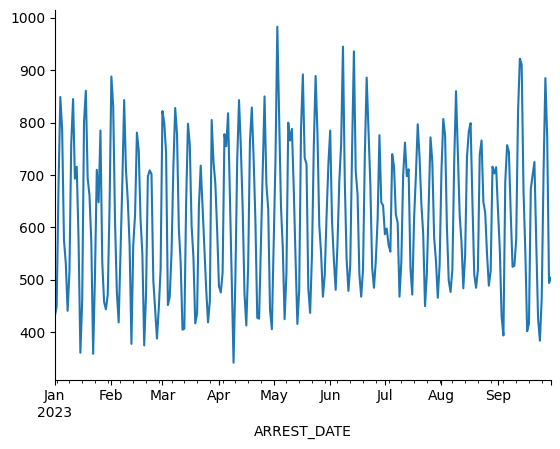

In [ ]:
date = pd.to_datetime(df['ARREST_DATE'])
df.index = date

arrests_per_date = df.resample('D')['ARREST_KEY'].count()
arrests_per_date.plot()
sns.despine()


#### What is the average number of arrest per day of week?

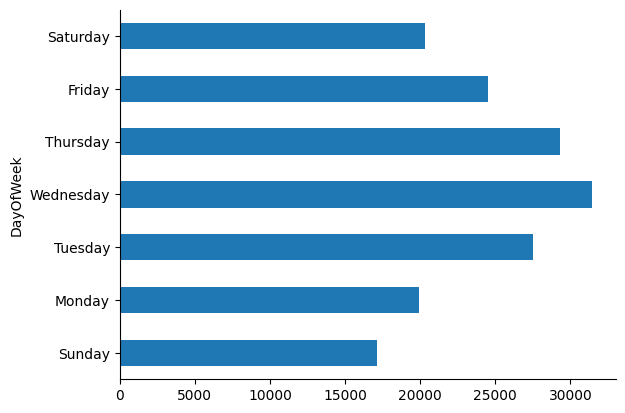

In [ ]:
df['DayOfWeek'] = df.index.day_name()
arrest_per_dayofweek = df.groupby('DayOfWeek')['ARREST_KEY'].count()
arrest_per_dayofweek = arrest_per_dayofweek[['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']]
arrest_per_dayofweek.plot(kind ='barh')
sns.despine()

In [ ]:
df.groupby(['OFNS_DESC'])['PERP_SEX'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
                                  ...  
HOMICIDE-NEGLIGENT-VEHICLE            2
DISRUPTION OF A RELIGIOUS SERV        2
FELONY SEX CRIMES                     2
ADMINISTRATIVE CODES                  1
UNLAWFUL POSS. WEAP. ON SCHOOL        1
Name: PERP_SEX, Length: 64, dtype: int64

In [ ]:
df.groupby(['OFNS_DESC', 'PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

OFNS_DESC                     PERP_SEX
ASSAULT 3 & RELATED OFFENSES  M           18148
PETIT LARCENY                 M           13411
FELONY ASSAULT                M           11446
DANGEROUS DRUGS               M           10064
MISCELLANEOUS PENAL LAW       M            9367
                                          ...  
KIDNAPPING                    U               1
JOSTLING                      U               1
HARRASSMENT 2                 U               1
ADMINISTRATIVE CODES          F               1
ENDAN WELFARE INCOMP          U               1
Name: PERP_SEX, Length: 172, dtype: int64

Q.What day of the week do felony assulats occur most on? Kidnappings?

A. Felony Assaults are most likely to occur on Weds.  This is the same day that all crimes are the highest.   There are few kidnappings.   They will be left out of the graph.

In [ ]:
violent_crimes=df.query('OFNS_DESC in ["FELONY ASSAULT", "KIDNAPPING"] ')
pd.crosstab(violent_crimes['OFNS_DESC'],violent_crimes['DayOfWeek'])
#ViolentCrimes['DayOfWeek'].value_counts()
#ViolentCrime group by dayof the week #


DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
OFNS_DESC,,,,,,,
FELONY ASSAULT,2148,2132,2055,1918,2459,2574,2744
KIDNAPPING,2,2,0,0,1,4,2


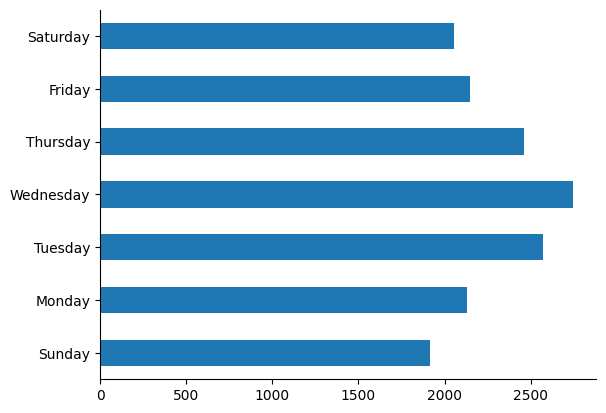

In [40]:

assaults_per_dayofweek = df.query('OFNS_DESC=="FELONY ASSAULT"')['DayOfWeek'].value_counts()
assaults_per_dayofweek = assaults_per_dayofweek[['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']]
assaults_per_dayofweek.plot(kind ='barh')
sns.despine()

Based on the data from NYC Arrests Data, the most crimes occur on Weds.  Violent Crimes are also most likley to occur on this day, and kidnappings do not really occur on any day of the week.  If I was visiting NYC or a resident of the city, I'd most likely do my errands and spend recreation time on the weekend days, Fri. - Sun.  T-Th are the days when most violent crimes occur. A future question that could be proposed is what burough viloent crimes occur in most.  

Final Thoughts: Importing the data was very difficult. I tried to download the data from the website onto my computer and then upload it to colab. It did not work.  Using !Wget command seems to be the solution.


